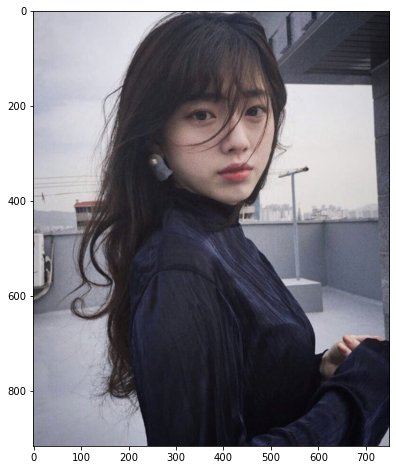

In [9]:


import matplotlib.pyplot as plt
import matplotlib.image as mpgimg
import json #json 형식 사용 key : value
import requests # 인터넷 연결

img = mpgimg.imread('person.jpg')   #사진 이름 설정
plt.figure(figsize=(10,8))          #액자설정
plt.imshow(img)                     #사진읽기
plt.show()                          #사진 쇼



client_id = 'YJ86dBbvZepeV6kbISPC'
client_secret = 'KgSdEC3k6r'

url = "https://openapi.naver.com/v1/vision/celebrity" # 얼굴감지
files = {'image': open('person.jpg','rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)

In [6]:
print(response.text) # 객체 내부보기


{"info":{"size":{"width":512,"height":341},"faceCount":7},"faces":[{"roi":{"x":107,"y":95,"width":22,"height":22},"landmark":{"leftEye":{"x":115,"y":100},"rightEye":{"x":124,"y":100},"nose":{"x":119,"y":105},"leftMouth":{"x":113,"y":110},"rightMouth":{"x":123,"y":110}},"gender":{"value":"male","confidence":0.906774},"age":{"value":"64~68","confidence":0.0628197},"emotion":{"value":"smile","confidence":0.927926},"pose":{"value":"frontal_face","confidence":0.888439}},{"roi":{"x":320,"y":87,"width":19,"height":19},"landmark":null,"gender":{"value":"female","confidence":0.990695},"age":{"value":"28~32","confidence":0.867978},"emotion":{"value":"smile","confidence":0.988107},"pose":{"value":"false_face","confidence":0.807469}},{"roi":{"x":211,"y":171,"width":18,"height":18},"landmark":null,"gender":{"value":"female","confidence":0.985471},"age":{"value":"40~44","confidence":0.0548427},"emotion":{"value":"neutral","confidence":0.732291},"pose":{"value":"part_face","confidence":0.586799}},{"r

In [10]:
parsed =json.loads(response.text) # 딕셔너리로 전환
print(parsed)

{'info': {'size': {'width': 750, 'height': 916}, 'faceCount': 1}, 'faces': [{'celebrity': {'value': '이성경', 'confidence': 0.370082}}]}


In [ ]:
print(json.dumps(parsed, indent=4,sort_keys=False,ensure_ascii=False))

In [62]:
parsed['faces']


[{'celebrity': {'value': '이성경', 'confidence': 0.359208}}]

In [35]:
parsed['faces'][0]['roi']
parsed['faces'][0]['age']


KeyError: 'roi'

In [63]:
for each in parsed['faces']:
    x,y,w,h=each['roi'].values()
    gender,gen_conf = each['gender'].values()
    age,age_conf = each['age'].values()
    emotion,emo_conf = each['emotion'].values()

    print(gender+age)


KeyError: 'roi'

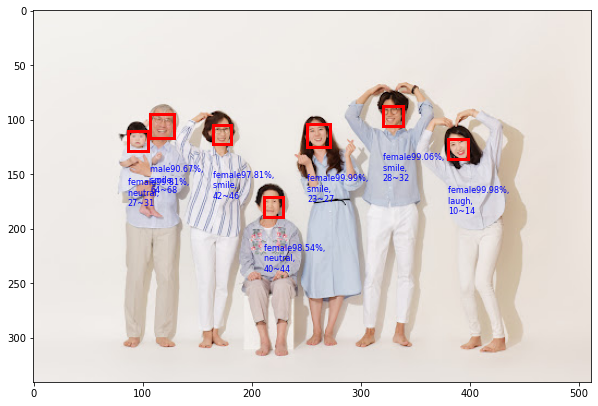

In [8]:
import matplotlib.patches as patches

img = mpgimg.imread('familyPhoto.jpg')

fig, ax = plt.subplots(figsize =(10,10))
ax.imshow(img)


for each in parsed['faces']:
    x,y,w,h=each['roi'].values()
    gender,gen_conf = each['gender'].values()
    age,age_conf = each['age'].values()
    emotion,emo_conf = each['emotion'].values()

    rect_face =patches.Rectangle((x,y),w,h,linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect_face)
    letter = gender +str(gen_conf*100)[0:5]+'%, \n'+emotion +', \n'+ age
    plt.text(x,y+h+50,letter,size=8,color='blue')

Text(550, 250, '이성경37.0082%, \n')

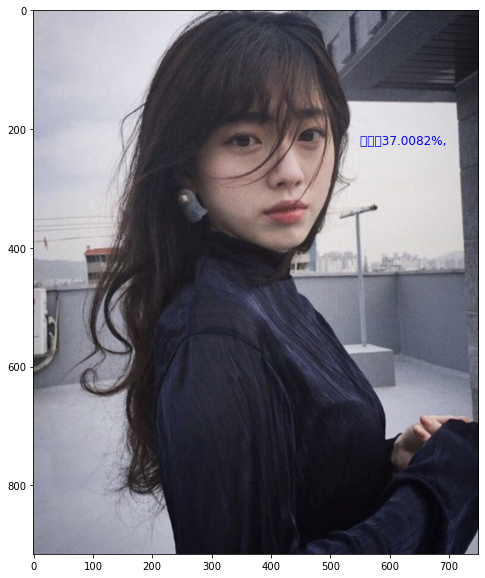

In [18]:
#연예인 닮은꼴 표시 어떤 연예인인지
#
import matplotlib.patches as patches

img = mpgimg.imread('person.jpg')

fig, ax = plt.subplots(figsize =(10,10))
ax.imshow(img)

cel= parsed['faces'][0]['celebrity']['value']
cel_conf = parsed['faces'][0]['celebrity']['confidence']
# rect_face =patches.Rectangle(x,y,linewidth=3,edgecolor='r',facecolor='none')
# ax.add_patch(rect_face)
letter = cel +str(cel_conf*100)+'%, \n'

plt.text(550,250,letter,size=12,color='blue')
# print(cel,cel_conf*100)

1 알고리즘이란..

- 문제나 과제를 해결하기 위한 처리 절차를 하나하나 구체적인 순서에 따라 표현한 아이디러나 생각...

- 알고리즘 자체는 일상생활에서도 이미 많이 사용되고 있다. 요리의 레시피, 음악의 악보, 가전제품 설명서...

- 알고리즘은 문자, 기호, 일러스트, 플로우차트 등으로 나타낸다

2 프로그래밍에서의 알고리즘
- 알고리즘을 프로그래밍 언어로 기술하면 프로그램이다.
- 프로그래밍 언어는 컴퓨터에 지시하기 위한 인공언어이다.

알고리즘은 눈에는 보이지 않기 때문에 이것을 전달하기 위해서는 문장이나 일러스트 플로우차트로 표현해야 한다.

알고리즘을 컴퓨터에 전달하기 위한 방법 프로그래밍이다.

로봇 청소기가 집안 청소하는 알고리즘

[전원 온] -[직진청소]- [장애물 만나면 방향 전환] -[직진청소] - [베터리가 5%이하면 충전기로]-[청소구역 확인]
- [전부 청소했으면 충전기로 복귀]

일반적으로 프로그램은 컴퓨터가 실행해 주기 원하는 처리 절차를 알고리즘으로 표현현한 후 이것을 프로그래밍 언어로 기술한 것이다.

사람의 생각 -> 알고리즘 -> 프로그램
기획 -> 설계(알고리즘) -> 프로그래밍 -> 디버깅 -> 문서작성

1. 기획 - 프로그램 작성의 계기가 되는 것은 요구(needs)이다. 고객으로부터 '이러이러한 문제를 해결하기 위한 프로그램'
을 요구 맞게 프로그램을 작성한다. 요구 사항들을 기록한 문서를 '요구사항 정의서' 매우 구체적인 요구.
이러한 요구 사항을 바탕으로 필요한 기능과 사양이 포함된 기획서를 작성한다.

2. 설계 - 요구사항 정의서와 기획서에 요구하는 바를 어느정도 파악하게 되면 어떤 기능이 필요 어떤 프로그램을 만들지 고려한다..
    -> 설계(알고리즘) 프로그램의 품질은 알고리즘의 좋고 나쁨에 달려있다. 문제를 분석하고 필요사양 기능을 검토하고 실현하기 위해
    알고리즘을 고려하는데 조건을 만족하는 알고리즘이 반드시 하나뿐이라고는 말할 수 없다.

3. 프로그래밍 - 알고리즘을 정한 뒤에는 프로그래밍을 한다.
    다른 말로 코딩이라고 한다. 개인이 프로그래밍을 할 경우는 어떤 언어를 사용할 것인지 스스로 판단하지만 회사에서 수주 받았거나 팀 단위로 작성할 때는 요구 사항에 맞게 진행해야 한다.
4. 프로그램이 완성되었으면 동작 테스틀르 실시한다. 문제 없이 동작하는지 확인한다. 만약 기대한 만큼 결과가 나타나지 않았거나 프로그램이 정상적으로 동작하지 않으면 이를 수정해야 한다. 오류를 찾아서 수정하는 작업을 디버그라고 한다.
    설계 단계에서 알고리즘을 확실히 고려했다면 버그를 약간 수정하게 되지만 설계 단계를 생략하거나 대략 넘기게 되면 결국 더 많은 시간과 노력이 들게 된다. 만일 동작 불량의 원인이 알고리즘에 있다면 프로그램 전체를 수정해야 하는 불상사가 발생할 수 도 있다. 따라서 이런 일을 방지하기 위해서라도 알고리즘 설계는 중요하다.

5. 문서화 - 프로그램을 완성한 후에는 문서를 작성해야 한다. 설계 단계에서 만든 설계서를 응용학나 손을 본 뒤 완성한다. 이러한 문서화가 필요한 이유는 프로그램을 만든 사람이 향후 보수 및 관리까지도 반드시 담당한다고 볼 수 없기 때문이다. 프로그램의 오류를 수정하거나 새로운 기능을 추가할 때 문제없이 진행할 수 있도록 문서를 준비하는 것이 바람직하다.

좋은 알고리즘이란?
1. 알기 쉽다. - 여러 사람이 작업을 주로 하기 때문에 다른 사람을 이해시킬 수 없다면 ,많은 시간이 걸리고 실수 범하기도 쉽다. 설계에서 프로그래밍까지 알고리즘이 어렵거나 복잡하면 나중에 수정하거나 기능을 추가할 때 그것을 만든 본인조차 이해하지 못하는 불상사가 발생할 수 있다. 또한 왜 그런 나쁜 결과가 발생했는지 검증하기가 어렵기 때문에 틀린 부분을 찾기 어렵다. 
2. 속도가 빠르다. - 짧은 시간에 올바른 결과를 얻을 수 있는 알고리즘이 좋은 알고리즘이다. 
3. 효율적이다. - '효율적이다' 라는 것은 프로그램을 실행할 때 사용하는 메모리가 작다는 것을 의미한다. 지금은 아니지만 예전에는 메모리의 가격이 상당한 고가였기 때문에 메모리를 적게 사용하는 것이 중요했다. 
4. 재이용이 쉽다. - 과거에 작성한 프로그램을 그대로 사용하거나 부분적으로 이용하는 비율이 증가하면 새로운 프로그램을 작성하는 시간이 그만큼 줄어들게 된다.

왜 알고리즘을 공부해야 하는가..

1. 좋은 프로그래밍을 만들기 위해
2. 좋고 나쁜 프로그램을 판단하기 위해
3. 프로그래밍을 효율적으로 작성하기 위해
4. 프로그래밍 기술을 향상시키기 위해

최근에는 알고리즘을 공부한 것이 없는 사람들도 프로그램을 작성할 수 있게 되었다. 실제로 현장에서 일하고 있는 프로그래머 중에서도 알고리즘을 전혀 배워 본적이 없는 사람이 많다. 그렇다면 과연 알고리즘을 공부할 필요가 있을까?

알고리즘의 세가지 기본형...

1. 순차구조 처음부터 순서대로만 처리 끝
2. 선택구조  조건식으로 판단해서 처리
3. 반복구조 조건을 만족하는 동안 반복처리

1. 순차구조 - 실행하기 원하는 처리를 위에서부터 처음부터 순서대로만 작성하는 것이 순차구조이다. 알고리즘 중에서도 가장 많이 사용된다.

2. 선택구조 - 당면이 다 팔리고 재고 없다면 당면을 산다라는 처리를 할 수 없다. 선택구조란 조건 판단의 처리를 하나로 국한함으로 인해 실행하는 내용을 바꾸는 절차를 말한다. no, 즉 당면이 모두 팔렸을 경우 뭔가 다른 대체품 여기서는 떡을 사서 되돌아오는 처리를 추가하여 중단을 막는다. 선택구조를 사용하면 알고리즘이 급격히 변환된다. 선택 구조를 사용하지 않는 알고리즘은 존재 하지 않을 정도로 매우 빈번하게 사용된다.

3. 반복구조 - 심부름에는 보상이 있기 마련이다. 심부름 거스름돈으로 붕어빵을 사먹어도 좋다' 보상이 주어졌다고 가정해 보면, 거스름돈이 1200원보다 적으면 붕어빵을 사먹을 수 없다. 많으면 하나 산다. 그래도 돈이 남으면 더 산다.

속도가 빠르고 효율적인 알고리즘을 만들기 위해서는 이 반복 구조를 얼마나 잘 활용하는지 중요하다. 컴퓨터는 반복처리에 매우 능숙하다. 반복구조는 효율적인 알고리즘의 핵심이다.

알고리즘 기술방법 - 순서도

- 순서도는 프로그래밍 언어를 사용하지 않고 알고리즘을 기술하는 방법
- 다른 말로는 플로차트 flowchart
- 도형 기호를 사용하여 알고리즘을 기술한다.

순서도는 알고리즘을 표현하는 수단 중 하나이다. 자신이 생각하고 있는 알고리즘이 올바른지 처리나 절차에 문제가 없는지를 스스로 눈으로 시각적으로 확인할 수 있고 다른 사람에게도 공유할 수 있다.

자세한 설명이 없어도 큰 어려움 없이 이해할 수 있고 이해 시킬 수 있는 것이 순서도의 장점이다. 

알고리즘 기술방법 2 - 의사언어(psudo code)

알고리즘의 또 다른 기술방법으로 의사언어가 있다.
의사 언어의 장점은 프로그래밍 언어에 의존하지 않고 알고리즘을 기술한다.

의사 언어는 프로그래밍 언어로 분류되고 보기에도 프로그래밍 언어처럼 보인다. 하지만 의사 언어로 작성한 프로그램은 컴퓨터에서 실행할 수는 없다. 특정 언어에 의존하지 않고 알고리즘을 표현한다는 점에서 공부나 알고리즘 단계에서 사용하기 적합하다. 어떤 언어로 작성할지 정해지지 않은 경우에서 의사 언어로 기술해 둘 수 있다.

의사 언어 기술 방법.
의사언어는 시작과 종료를 특별히 기술하지 않는다. 특정 규칙이 없다.

- 슈퍼마켓에 간다
- 당면을 산다
- 집에 돌아온다